In [3]:
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/1647655986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_new['year'] = pd.to_numeric(douglas_data_new['year'])
/var/folders/gv/8y8kgtw10_37gt24l8br4nvc0000gn/T/ipykernel_74726/1647655986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  douglas_data_new['births'] = pd.to_numeric(douglas_data_new['births'])


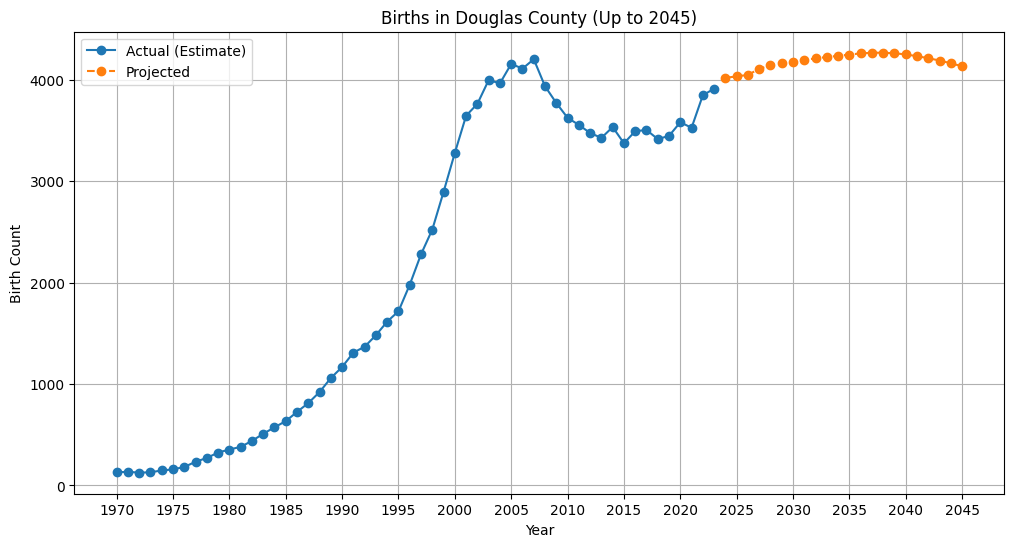

In [4]:
# Load the new CSV file
new_file_path = 'components-change-county.csv'
df_new = pd.read_csv(new_file_path)

# Filter data for Douglas County (FIPS code: 35)
douglas_data_new = df_new[df_new['countyfips'] == 35]

# Convert year and births to numeric
douglas_data_new['year'] = pd.to_numeric(douglas_data_new['year'])
douglas_data_new['births'] = pd.to_numeric(douglas_data_new['births'])

# Filter data up to 2045
douglas_data_new = douglas_data_new[douglas_data_new['year'] <= 2045]

# Separate actual estimates and projections
actual_data_new = douglas_data_new[douglas_data_new['datatype'] == 'Estimate']
projected_data_new = douglas_data_new[douglas_data_new['datatype'] == 'Projection']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(actual_data_new['year'], actual_data_new['births'], marker='o', label='Actual (Estimate)')
plt.plot(projected_data_new['year'], projected_data_new['births'], marker='o', label='Projected', linestyle='--')

# Customize the plot
plt.title('Births in Douglas County (Up to 2045)')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.xticks(range(min(douglas_data_new['year']), 2046, 5))
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
